<a href="https://colab.research.google.com/github/shourya03roy/Crop-Pattern-Prediction/blob/main/Crop_Pattern_Prediction(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv')
label = data['label'].unique()
data['label'] = data['label'].replace({'rice' : 0, 'maize': 1, 'chickpea' : 2, 'kidneybeans' : 3, 'pigeonpeas' : 4,'mothbeans' : 5, 'mungbean' : 6, 'blackgram' : 7, 'lentil' : 8, 'pomegranate' : 9, 'banana' : 10, 'mango' : 11, 'grapes' : 12, 'watermelon' : 13, 'muskmelon' : 14, 'apple' : 15, 'orange' : 16, 'papaya' : 17, 'coconut' : 18, 'cotton' : 19, 'jute' : 20, 'coffee' : 21})
X_train, X_, y_train, y_ = train_test_split(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],data['label'], test_size=0.30, random_state=1,shuffle=True)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1,shuffle=True)
print(label)
print(data.head())
X_train,y_train

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536      0
1  85  58  41    21.770462  80.319644  7.038096  226.655537      0
2  60  55  44    23.004459  82.320763  7.840207  263.964248      0
3  74  35  40    26.491096  80.158363  6.980401  242.864034      0
4  78  42  42    20.130175  81.604873  7.628473  262.717340      0


(        N   P   K  temperature   humidity        ph    rainfall
 625    34  45  21    28.188371  82.606297  6.287380   37.011104
 642     7  60  25    28.275317  82.760208  6.397637   56.049954
 39     63  44  41    24.172988  83.728757  5.583370  257.034355
 2191  118  31  34    27.548230  62.881792  6.123796  181.417081
 456    13  73  20    30.504209  35.488860  5.391560  162.592772
 ...   ...  ..  ..          ...        ...       ...         ...
 960     1  27  36    23.985988  93.342366  5.684995  104.991282
 905    31  25  38    24.962732  92.405014  6.497367  109.416919
 1096   92  81  52    28.010680  76.528081  5.891414  103.704078
 235    28  58  81    17.475010  16.543148  6.180427   93.350343
 1061   95  74  50    25.901131  80.471527  6.002482  110.103230
 
 [1540 rows x 7 columns],
 625      6
 642      6
 39       0
 2191    21
 456      4
         ..
 960      9
 905      9
 1096    10
 235      2
 1061    10
 Name: label, Length: 1540, dtype: int64)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
tf.random.set_seed(1234)
from keras import regularizers
model = Sequential(
    [
        Dense(7, activation = 'relu',   name = "L1",kernel_regularizer=regularizers.l2(0.01)),
        Dense(10, activation = 'relu',   name = "L2",kernel_regularizer=regularizers.l2(0.01)),
        Dense(13, activation = 'relu',   name = "L3",kernel_regularizer=regularizers.l2(0.01)),
        Dense(15, activation = 'relu',   name = "L4",kernel_regularizer=regularizers.l2(0.01)),
        Dense(18, activation = 'relu',   name = "L5",kernel_regularizer=regularizers.l2(0.01)),
        Dense(22, activation = 'linear', name = "L6",kernel_regularizer=regularizers.l2(0.01)),
    ]
)



In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,y_train,
    epochs=1000,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping]
)

Epoch 1/1000
49/49 [==============================] - 2s 9ms/step - loss: 3.6381 - accuracy: 0.1175 - val_loss: 2.8301 - val_accuracy: 0.1758
Epoch 2/1000
49/49 [==============================] - 0s 3ms/step - loss: 2.3304 - accuracy: 0.3169 - val_loss: 1.8672 - val_accuracy: 0.3727
Epoch 3/1000
49/49 [==============================] - 0s 3ms/step - loss: 1.6849 - accuracy: 0.4753 - val_loss: 1.4342 - val_accuracy: 0.5576
Epoch 4/1000
49/49 [==============================] - 0s 3ms/step - loss: 1.3538 - accuracy: 0.5961 - val_loss: 1.0365 - val_accuracy: 0.7545
Epoch 5/1000
49/49 [==============================] - 0s 3ms/step - loss: 1.2888 - accuracy: 0.6364 - val_loss: 1.1239 - val_accuracy: 0.6727
Epoch 6/1000
49/49 [==============================] - 0s 3ms/step - loss: 1.1328 - accuracy: 0.6760 - val_loss: 1.2491 - val_accuracy: 0.5818
Epoch 7/1000
49/49 [==============================] - 0s 3ms/step - loss: 1.1041 - accuracy: 0.6812 - val_loss: 1.1969 - val_accuracy: 0.6394
Epoch 

In [ ]:
# model.evaluate(X_train,y_train)
# model.evaluate(X_cv,y_cv)
# model.evaluate(X_test,y_test)
# pd.DataFrame(history.history).plot()

In [ ]:
p_preferred = model.predict(X_train)
y_pred = []
for i in range(len(y_train)):
    y_pred.append(np.argmax(p_preferred[i]))
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_train)*100

49/49 [==============================] - 0s 2ms/step


88.44155844155844

<Axes: >

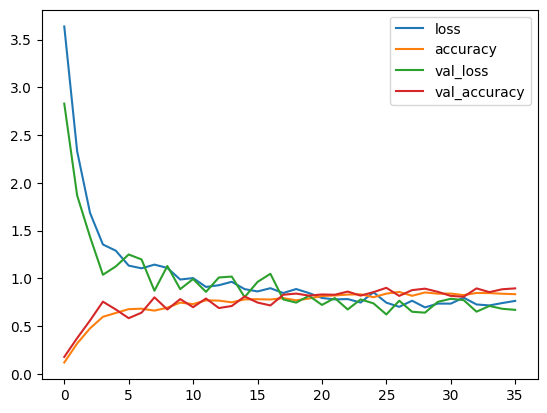

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
p_cpreferred = model.predict(X_cv)
y_cpred = []
for i in range(len(y_cv)):
    y_cpred.append(np.argmax(p_cpreferred[i]))
accuracy_score(y_cpred, y_cv)*100

11/11 [==============================] - 0s 3ms/step


90.0

In [ ]:
p_tpreferred = model.predict(X_test)
y_tpred = []
for i in range(len(y_test)):
    y_tpred.append(np.argmax(p_tpreferred[i]))
from sklearn.metrics import accuracy_score
accuracy_score(y_tpred, y_test)*100

11/11 [==============================] - 0s 2ms/step


85.15151515151516

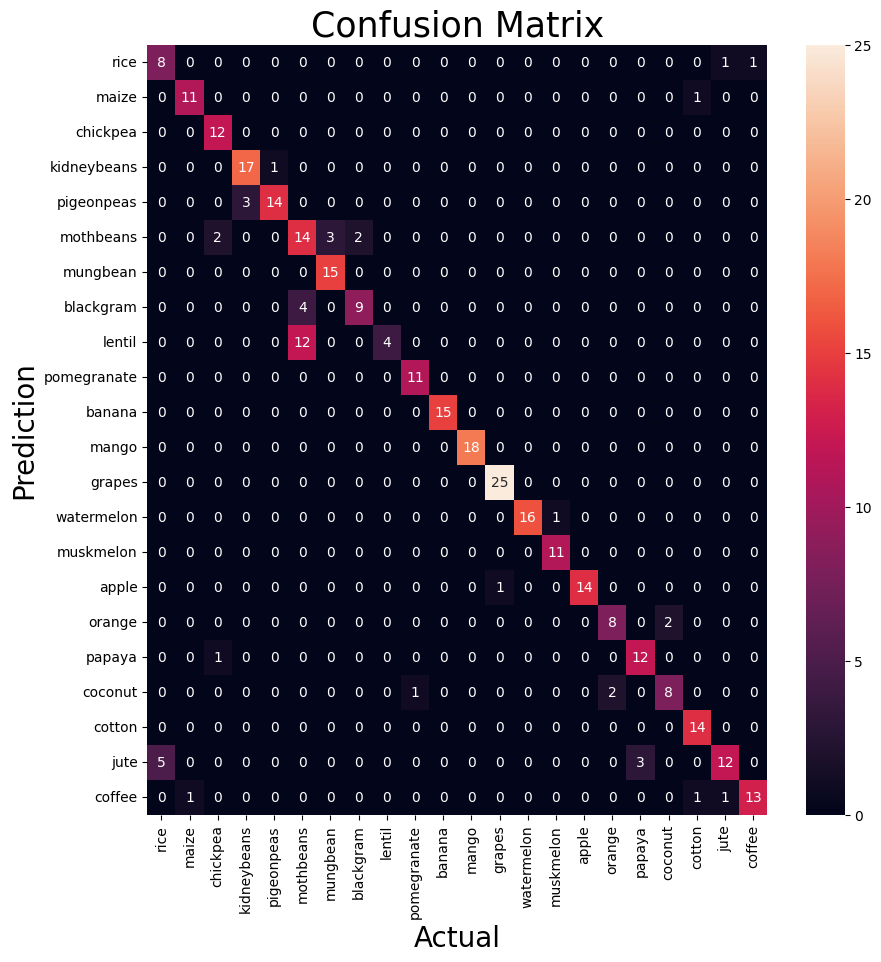

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_tpred)
plt.figure(figsize = (10,10))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=label,
            yticklabels=label)
plt.ylabel('Prediction',fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.title('Confusion Matrix',fontsize=25)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_tpred,average="weighted")
recall = recall_score(y_test, y_tpred,average="weighted")
print("Precision: ", precision*100)
print("Recall: ", recall*100)

Precision:  87.12484989757716
Recall:  85.15151515151516


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

# Define and train base models
base_models = [
    ("logistic_regression", LogisticRegression(multi_class='multinomial')),
    ("neural_network", DecisionTreeRegressor()),
]

estimators = []
for name, model in base_models:
    model.fit(X_train, y_train)
    estimators.append((name, model))

# Define and train meta-model
meta_model = StackingRegressor(estimators=estimators)
meta_model.fit(X_train, y_train)

# Make predictions on test set
y_train_pred = meta_model.predict(X_train)
y_test_pred = meta_model.predict(X_test)

# Evaluate model performance (e.g., using R-squared or mean squared error)


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers
from sklearn.linear_model import LogisticRegression

# Define the neural network with a final softmax activation
nn_model = tf.keras.Sequential([
    layers.Dense(7, activation='relu', name="L1", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', name="L2", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(13, activation='relu', name="L3", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(15, activation='relu', name="L4", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(18, activation='relu', name="L5", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(22, activation='softmax', name="L6")  # Softmax output for multi-class classification
])

# Define the logistic regressor
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', C=0.325, max_iter=100, penalty='l2')

# Create a model that concatenates outputs from both models
def combined_model(inputs):
    nn_output = nn_model(inputs)
    log_reg_output = log_reg.predict_proba(nn_output)
    return tf.concat([nn_output, log_reg_output], axis=1)

# Create the multi-output model
combined_model = tf.keras.Model(inputs=nn_model.inputs, outputs=layers.Lambda(combined_model)(nn_model.inputs))

# Compile the multi-output model
combined_model.compile(
    loss=[
        tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss for neural network output
        'categorical_crossentropy'  # Loss for logistic regression output
    ],
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

# Train the multi-output model
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

history = combined_model.fit(
    X_train, [y_train, y_train],  # Provide both neural network and logistic regression targets
    epochs=1000,
    validation_data=(X_cv, [y_cv, y_cv]),
    callbacks=[early_stopping]
)

TypeError: Exception encountered when calling layer 'sequential_3' (type Sequential).

Inputs to a layer should be tensors. Got 'None' (of type <class 'NoneType'>) as input for layer 'L1'.

Call arguments received by layer 'sequential_3' (type Sequential):
  • inputs=None
  • training=None
  • mask=None